## Used Car Price Predictor

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# Load modules for linear regression
from sklearn.linear_model import LinearRegression

In [4]:
# Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

### How could Highway-mpg help us predict car price?


In [5]:
X = df[['highway-mpg']]
Y = df['price']

In [6]:
lm.fit(X,Y)

LinearRegression()

In [7]:
# Output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
# Value of the intercept
lm.intercept_

38423.3058581574

In [9]:
# Value of slope
lm.coef_

array([-821.73337832])

### Final estimated linear model is

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>


## How could Engine-size help us predict car price?

In [10]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [11]:
lm1.fit(df[['engine-size']],df[['price']])
lm1

LinearRegression()

In [12]:
# Slope
lm1.coef_

array([[166.86001569]])

In [13]:
# Intercept 
lm1.intercept_

array([-7963.33890628])

<b>price</b> = -7963.34 + 166.86 x  <b>engine-size</b>

<p>We know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

In [14]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [15]:
lm.fit(Z, df['price'])

LinearRegression()

In [16]:
# Intercept
lm.intercept_

-15806.624626329198

In [17]:
# Coefficients
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## Final estimated model is

<b>Price</b> = -15806.624626329198 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>


### Create and train a MLR model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and highway-mpg-

In [18]:
z = df[['normalized-losses','highway-mpg']]

In [19]:
lm2 = LinearRegression()
lm2.fit(z,df['price'])

LinearRegression()

In [20]:
# coefficients
lm2.coef_

array([   1.49789586, -820.45434016])

## Model Evaluation using Visualization

In [21]:
# Import seaborn
import seaborn as sns
%matplotlib inline

## Regression Plot

(0.0, 48179.88217877906)

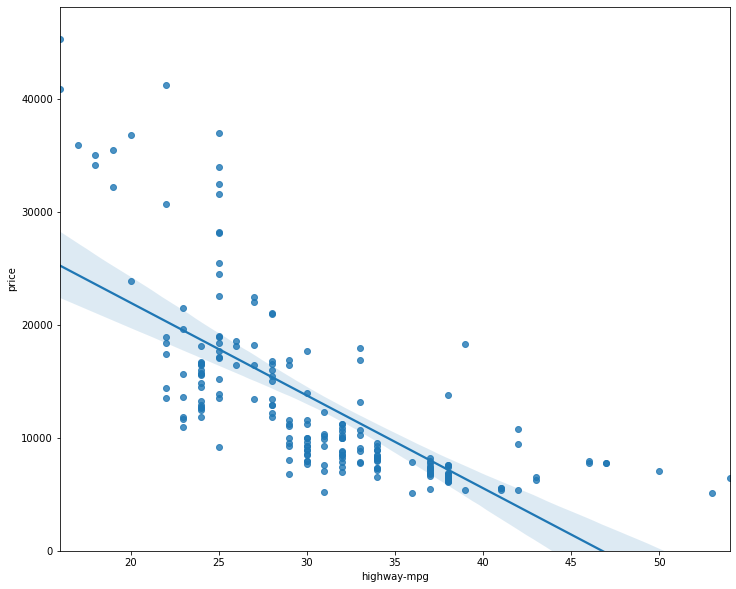

In [22]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y='price',data=df)
plt.ylim(0,)

<p>Negative correlation, however data is too scattered from regression line. Linear model does not seem to be the best fit.</p

(0.0, 47414.1)

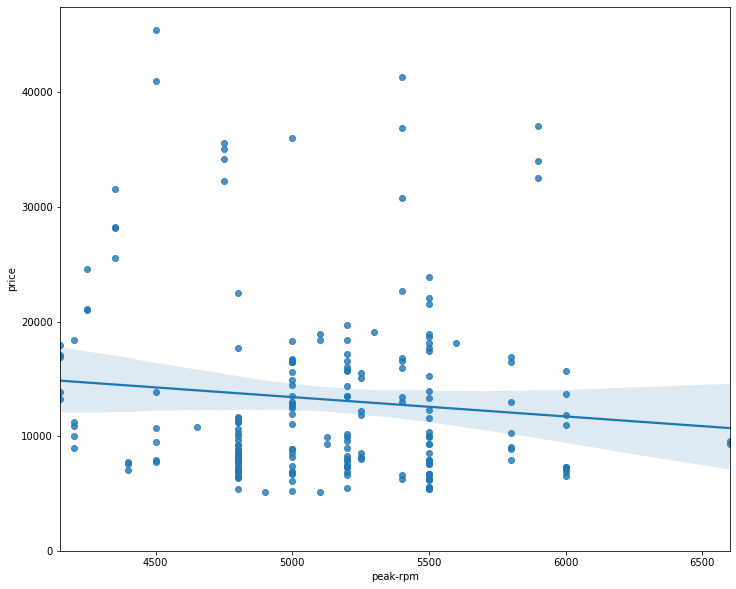

In [23]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

<p>Seemingly, no correlation</p>

In [24]:
# Compare correlation values of 'peak-rpm' and 'highway-mpg' with 'price'

df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<p>'Highway-mpg' has a stronger correlation with 'price</p>

## Residual Plot

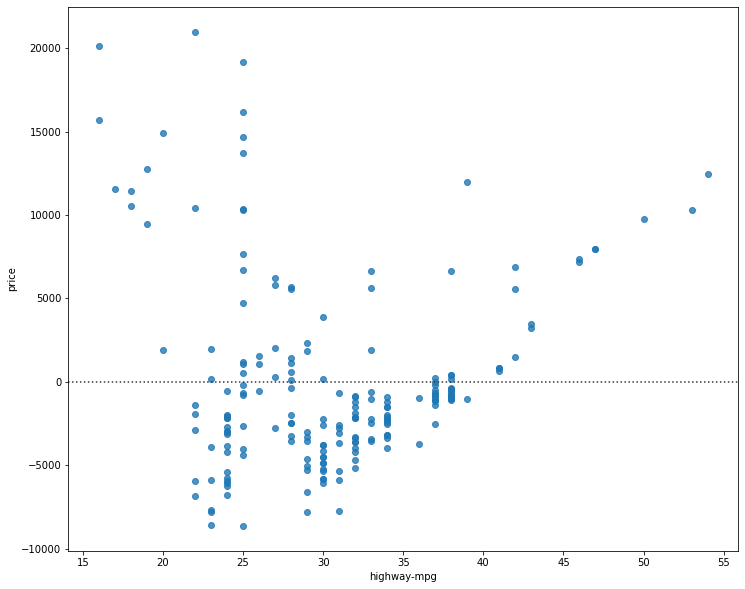

In [27]:
plt.figure(figsize=(width,height))
sns.residplot(x='highway-mpg',y='price',data=df)
plt.show()

<p>Residuals are not randomly spread around the x-axis, so a non-linear model may be more appropriate for this dataset.</p>

## Multiple Linear Regression (MLR)

In [28]:
# Make a prediction
Y_hat = lm.predict(Z)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


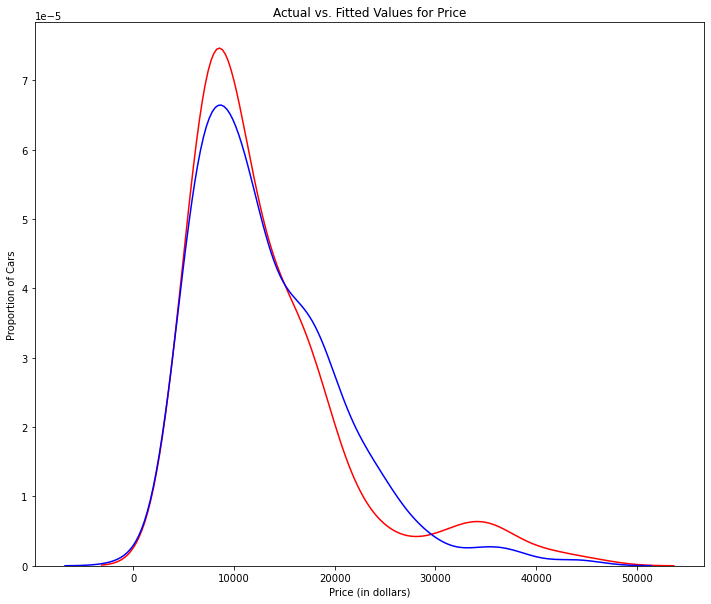

In [32]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs. Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>Can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definetly room for improvement.</p>

## Polynomial Regression and Pipelines

In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [34]:
x=df['highway-mpg']
y=df['price']

In [35]:
# Fit the polynomial with the 3rd order (cubic)
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


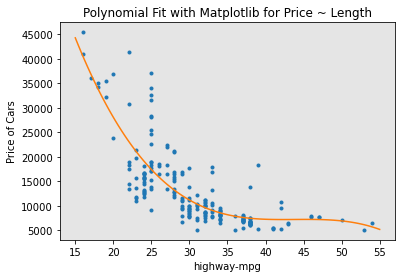

In [36]:
# Plot the function
PlotPolly(p,x,y,'highway-mpg')

<p>From this plot, it is evident that this polynomial model performs better than the linear model.</p>

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


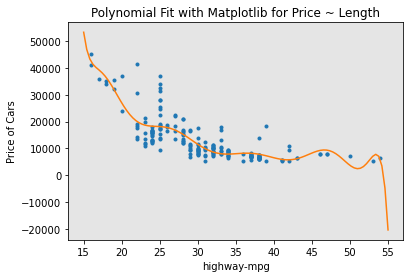

In [37]:
# Create an 11 order polynomial model with the variables x and y from above
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'highway-mpg')

## Multivariate Polynomial Functions

In [38]:
# import necessary modules for polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [39]:
# Create a PolynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [40]:
Z_pr = pr.fit_transform(Z)

In [41]:
Z.shape

(201, 4)

In [42]:
# After the transformation
Z_pr.shape

(201, 15)

## Pipeline

In [43]:
# import modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [44]:
# Create the pipeline

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]

In [45]:
# input the list as an argument to the pipeline constructor

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [46]:
# Normalize data, perform a transformation and fit the model simultaneously
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [47]:
#normalize the data, perform a transform and produce a prediction simultaneously

ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [48]:
# create a pipeline that Standardizes the data, performs prediction using linreg using the features Z and targets y
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Measures for In-Sample Evaluation

### Model 1 : SLR

In [49]:
# highway-mpg fit
lm.fit(X,Y)

LinearRegression()

In [50]:
# R^2

print('The R-square is: ', lm.score(X,Y))

The R-square is:  0.4965911884339176


<p>We can say that ~49.659% of the variation of the price is explained by this SLR model</p>

In [51]:
Yhat=lm.predict(X)
print("The output of the first four predicted values are: ", Yhat[0:4])

The output of the first four predicted values are:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [52]:
# import mse module
from sklearn.metrics import mean_squared_error

In [53]:
mse = mean_squared_error(df['price'],Yhat)
print('The MSE of price and the precited values is: ',mse)

The MSE of price and the precited values is:  31635042.944639888


### Model 2: MLR

In [54]:
lm.fit(Z,df['price'])

#R^2
print('The R-sqaure is: ',lm.score(Z,df['price']))

The R-sqaure is:  0.8093562806577457


<p>We can say that ~80.936% of the variation of price is explained by this MLR model</p>

In [55]:
# produce a prediction
Y_predict_multifit = lm.predict(Z)


In [56]:
# MSE
print('The MSE of price and predicted values using multifit is: ', \
     mean_squared_error(df['price'], Y_predict_multifit))

The MSE of price and predicted values using multifit is:  11980366.87072649


### Model 3 : Polynomial Fit

In [57]:
# import r2_score module
from sklearn.metrics import r2_score

In [58]:
r_squared = r2_score(y, p(x))
print('The R-squared value is: ', r_squared)

The R-squared value is:  0.6741946663906522


<p>We can say that ~67.419% of the variation of price is explained by this polynomial fit model</p>

In [59]:
#MSE
mean_squared_error(df['price'],p(x))

20474146.426361203

## Prediction and Decision-Making

In [61]:
# Created a new input
new_input = np.arange(1,100,1).reshape(-1,1)

In [62]:
# Fit the model
lm.fit(X,Y)
lm

LinearRegression()

In [63]:
# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

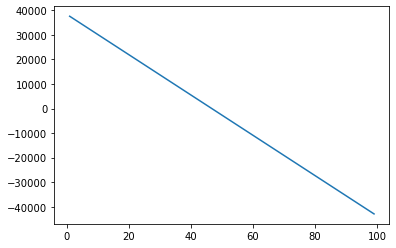

In [65]:
# plot the data
plt.plot(new_input, yhat)
plt.show()

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.


<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

## SLR vs MLR

<p>The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</p>

<p><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).



This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.</p>


## SLR vs Polynomial Fit

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>

## MLR vs Polynomial Fit

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>

## Conclusion

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>
